In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import boto3

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
print(tensorflow.__version__)


2.13.0


In [3]:
import keras

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten

In [5]:
import support as support

In [6]:
#df_train_s3 = support.read_from_s3("hr_train_data","hranalyticsdata/new")

In [6]:
df_train_s3 = pd.read_csv("aug_train.csv")

In [7]:
df_train = df_train_s3.copy()
df_train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [8]:
print ('Train data:',df_train.shape)

Train data: (19158, 14)


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
 df_train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [11]:
df_train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [20]:
df_train['city'].nunique()

123

In [37]:
df_train['training_hours'].unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

In [12]:
df_train.groupby([ 'education_level', 'enrolled_university']).count()

enrollee_id  city  \
education_level enrolled_university                      
Graduate        Full time course            2209  2209   
                Part time course             784   784   
                no_enrollment               8434  8434   
High School     Full time course             864   864   
                Part time course             166   166   
                no_enrollment                940   940   
Masters         Full time course             557   557   
                Part time course             204   204   
                no_enrollment               3547  3547   
Phd             Full time course              25    25   
                Part time course              12    12   
                no_enrollment                371   371   
Primary School  Full time course              33    33   
                Part time course              11    11   
                no_enrollment                255   255   

                                     city_development_index  gender  \
education_level enrolled_university                                   
Graduate        Full time course                       2209    1501   
                Part time course                        784     593   
                no_enrollment                          8434    6835   
High School     Full time course                        864     644   
                Part time course                        166     123   
                no_enrollment                           940     701   
Masters         Full time course                        557     366   
                Part time course                        204     135   
                no_enrollment                          3547    2793   
Phd             Full time course                         25      15   
                Part time course                         12       9   
                no_enrollment                           371     303   
Primary School  Full time course                         33      19   
                Part time course                         11       6   
                no_enrollment                           255     182   

                                     relevent_experience  major_discipline  \
education_level enrolled_university                                          
Graduate        Full time course                    2209              2200   
                Part time course                     784               784   
                no_enrollment                       8434              8422   
High School     Full time course                     864                 0   
                Part time course                     166                 0   
                no_enrollment                        940                 0   
Masters         Full time course                     557               556   
                Part time course                     204               203   
                no_enrollment                       3547              3543   
Phd             Full time course                      25                25   
                Part time course                      12                12   
                no_enrollment                        371               371   
Primary School  Full time course                      33                 0   
                Part time course                      11                 0   
                no_enrollment                        255                 0   

                                     experience  company_size  company_type  \
education_level enrolled_university                                           
Graduate        Full time course           2195          1040          1073   
                Part time course            784           587           571   
                no_enrollment              8418          6705          6511   
High School     Full time course            864           252           281   
                Part time course         

In [13]:
df_train['target'].unique()

array([1., 0.])

- Transformation:
    - Gender, major_discipline column: Create another category called "others"
    - enrolled_university, education_level, last_new_jobs: fill it with the mode
    - figure how to handle company_size and company_type = company_type(Other), experience (Mode), company_size (Other)
- Analysis:
    - A lot of analysis: create a presentation powerpoint, pdf
        - correlations
        - bar plot
        - pie charts
- ML Transformation
    - Label Encoder
    - One Hot Encoding
    - Embedding
    
- Model 
        

In [14]:
df_train['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [15]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [16]:
tran = support.Transformation(df_train)

In [44]:
hr = tran.run_process()

In [45]:
hr.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [46]:
hr = hr.drop("enrollee_id", axis=1)

In [47]:
hr.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [48]:
hr['city_development_index'].unique()

array([0.776, 0.767, 0.762, 0.92 , 0.913, 0.926, 0.843, 0.624, 0.91 ,
       0.923, 0.666, 0.794, 0.924, 0.754, 0.939, 0.887, 0.865, 0.855,
       0.827, 0.893, 0.884, 0.866, 0.802, 0.55 , 0.897, 0.925, 0.896,
       0.878, 0.693, 0.698, 0.949, 0.789, 0.903, 0.727, 0.64 , 0.516,
       0.579, 0.804, 0.743, 0.915, 0.899, 0.836, 0.89 , 0.795, 0.682,
       0.558, 0.796, 0.895, 0.769, 0.84 , 0.691, 0.742, 0.555, 0.738,
       0.527, 0.921, 0.856, 0.479, 0.73 , 0.764, 0.68 , 0.689, 0.848,
       0.722, 0.763, 0.74 , 0.766, 0.788, 0.83 , 0.78 , 0.898, 0.847,
       0.556, 0.512, 0.725, 0.739, 0.563, 0.775, 0.647, 0.701, 0.645,
       0.824, 0.745, 0.448, 0.735, 0.518, 0.649, 0.781, 0.625, 0.493,
       0.487, 0.664, 0.807])

In [49]:
hr["city"] = pd.qcut(
    hr["city_development_index"],
    q=[0, 0.25, 0.5, 0.75, 1],
    labels=["Under_Developed", "Developing", "Developed","High_Earned"],
)

In [50]:
hr["city"].value_counts()

Developed          7024
Under_Developed    4838
Developing         4759
High_Earned        2537
Name: city, dtype: int64

In [26]:
#hr = hr.drop("city_development_index", axis=1)

In [51]:
hr.head(2)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Developing,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,Developing,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


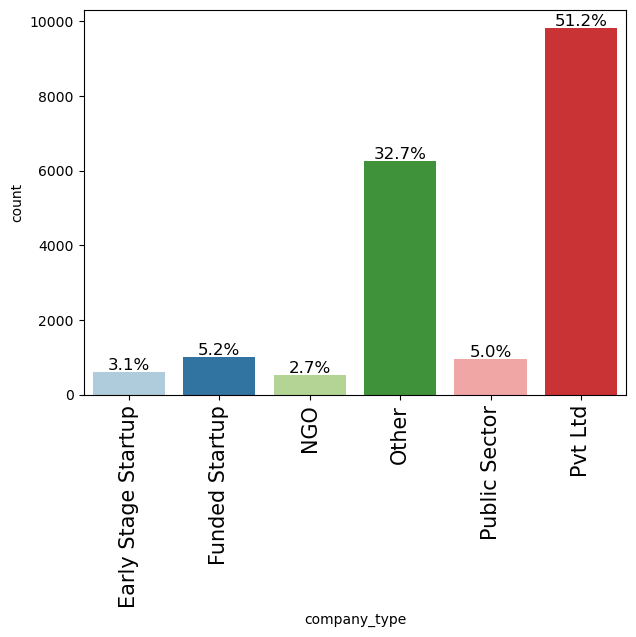

In [52]:
support.labeled_barplot(hr,"company_type",perc=True)

In [53]:
import matplotlib.pyplot as plt

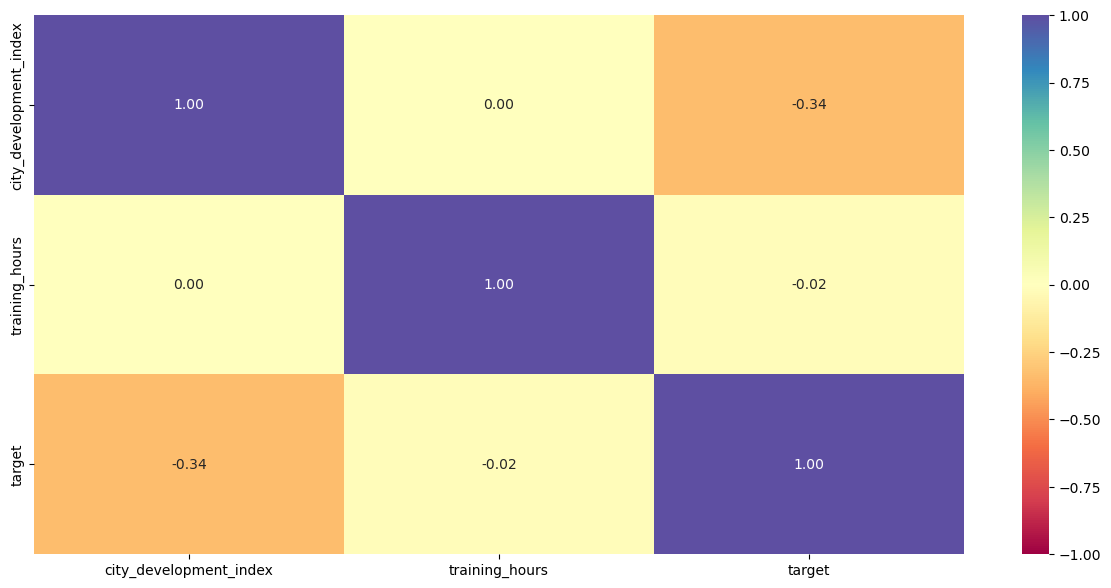

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(hr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

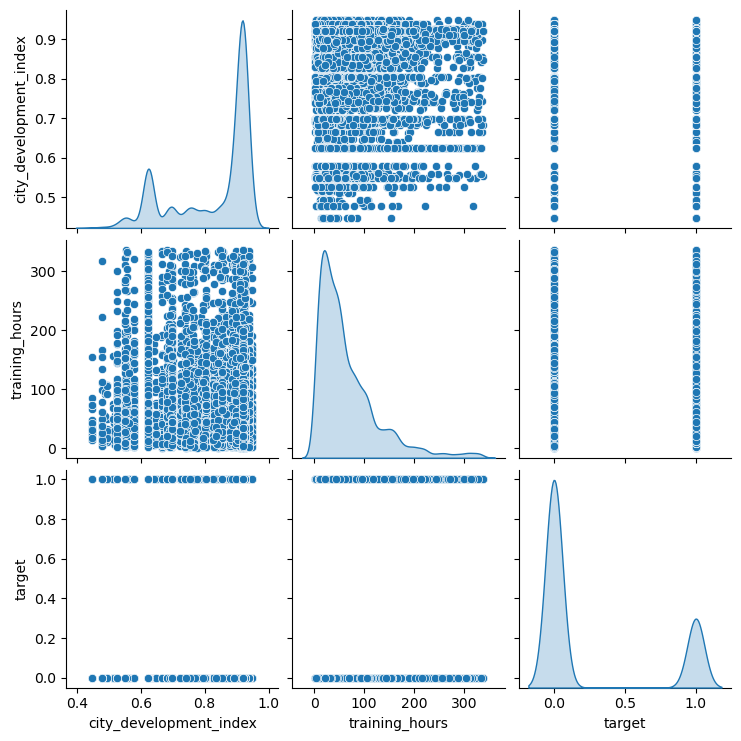

In [26]:
sns.pairplot(data=hr, diag_kind="kde")
plt.show()

#pip install pivottablejs

In [55]:
from pivottablejs import pivot_ui

pivot_ui(hr)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
hr.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [56]:
encoder = LabelEncoder()

hr['relevent_experience'] = encoder.fit_transform(hr['relevent_experience'])
hr['experience'] = encoder.fit_transform(hr['experience'])
hr['company_size'] = encoder.fit_transform(hr['company_size'])
hr['company_type'] = encoder.fit_transform(hr['company_type'])
hr['last_new_job'] = encoder.fit_transform(hr['last_new_job'])

In [57]:
hr.head(2)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Developing,0.776,Male,1,no_enrollment,Graduate,STEM,6,4,5,4,47,0.0
1,Developing,0.767,Male,0,no_enrollment,Masters,STEM,21,4,1,3,8,0.0


In [58]:
encoded_df = pd.get_dummies(hr, columns=['city', 'gender',
       'enrolled_university', 'education_level'])


In [59]:
encoded_df.head()

,city_development_index,relevent_experience,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_Under_Developed,...,gender_Male,gender_Other,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School
0,0.776,1,STEM,6,4,5,4,47,0.0,0,...,1,0,0,0,1,1,0,0,0,0
1,0.767,0,STEM,21,4,1,3,8,0.0,0,...,1,0,0,0,1,0,0,1,0,0
2,0.762,0,STEM,4,7,5,4,18,1.0,0,...,1,0,0,0,1,1,0,0,0,0
3,0.920,0,STEM,17,4,5,0,46,1.0,0,...,1,0,0,0,1,1,0,0,0,0
4,0.920,0,STEM,15,6,5,0,108,0.0,0,...,1,0,0,0,1,1,0,0,0,0


In [60]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [61]:
from torch.nn import Embedding
import torch

In [62]:
import numpy as np

In [68]:
def create(encoder_list):
    # an Embedding module containing 10 tensors of size 3
    embedding = Embedding(20, 3)
    # a batch of 2 samples of 4 indices eac

    #label_encoder = [1, 2, 3, 4]
    inp = torch.LongTensor([encoder_list])
    out = embedding(inp)
   
    def get_embedding(val):
        lis = list(torch.detach(out).numpy()[0, encoder_list.index(val)])
        return lis
    return get_embedding

In [69]:
def powers(val):
    v = get(val)
    return v[0], v[1], v[2]

In [63]:
encoded_df['major_discipline'].unique()

array(['STEM', 'Humanities', 'Business Degree', 'Other', 'No Major',
       'Arts'], dtype=object)

In [64]:
dic = {'STEM': 0, 'Humanities': 1, 'Business Degree': 2, 'Other': 3, 'No Major': 4, 'Arts': 5}

In [65]:
encoded_df['major_discipline'] = encoded_df['major_discipline'].apply(lambda x: dic[x])

In [66]:
encoded_df.head()

,city_development_index,relevent_experience,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_Under_Developed,...,gender_Male,gender_Other,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School
0,0.776,1,0,6,4,5,4,47,0.0,0,...,1,0,0,0,1,1,0,0,0,0
1,0.767,0,0,21,4,1,3,8,0.0,0,...,1,0,0,0,1,0,0,1,0,0
2,0.762,0,0,4,7,5,4,18,1.0,0,...,1,0,0,0,1,1,0,0,0,0
3,0.920,0,0,17,4,5,0,46,1.0,0,...,1,0,0,0,1,1,0,0,0,0
4,0.920,0,0,15,6,5,0,108,0.0,0,...,1,0,0,0,1,1,0,0,0,0


In [70]:
get = create(list(set(encoded_df['major_discipline'].unique())))

In [71]:
encoded_df['major_discipline1'], encoded_df['major_discipline2'], encoded_df['major_discipline3'] = zip(*encoded_df['major_discipline'].map(powers))

In [72]:
encoded_df.head()

,city_development_index,relevent_experience,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_Under_Developed,...,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline1,major_discipline2,major_discipline3
0,0.776,1,0,6,4,5,4,47,0.0,0,...,0,1,1,0,0,0,0,0.411135,1.717199,0.383905
1,0.767,0,0,21,4,1,3,8,0.0,0,...,0,1,0,0,1,0,0,0.411135,1.717199,0.383905
2,0.762,0,0,4,7,5,4,18,1.0,0,...,0,1,1,0,0,0,0,0.411135,1.717199,0.383905
3,0.920,0,0,17,4,5,0,46,1.0,0,...,0,1,1,0,0,0,0,0.411135,1.717199,0.383905
4,0.920,0,0,15,6,5,0,108,0.0,0,...,0,1,1,0,0,0,0,0.411135,1.717199,0.383905


In [73]:
copy HR-Analytics.ipynb "C:\Users\Nathaniel\PycharmProjects\HR_Recruitment_Analysis\"

        1 file(s) copied.


In [139]:
copy support.py "C:\Users\Nathaniel\PycharmProjects\HR_Recruitment_Analysis\"

        1 file(s) copied.
